### Top 10 Currencies by Market Cap. As of 01.06.2021 - 21:21 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

coins = pd.read_csv('Top10Coins.csv').set_index('Kryptowährung')
coins

,Marktkapitalisierung
Kryptowährung,
Bitcoin,552665314535
Ethereum,243729999058
Tether,50567518392
Cardano,45173647551
Binance Coin,44150653000
Ripple,37679911038
Dogecoin,36096511084
USD Coin,18560259199
Polkadot,17182134186


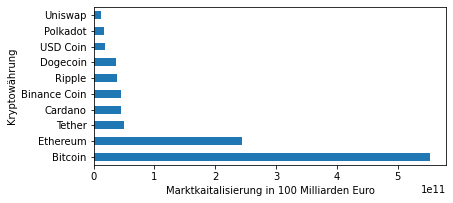

In [2]:
ax = coins.plot(kind='barh', use_index=True, legend=False, figsize=(7,3), sort_columns=False)
plt.gcf().subplots_adjust(bottom=0.15, left=0.2)
ax.set_xlabel('Marktkaitalisierung in 100 Milliarden Euro')
plt.savefig('./images/marketcap.pdf')

### Energy Consumption of Bitcoin

In [3]:
energy = pd.read_csv('energy.csv').set_index('Consumer')

In [4]:
energy

,Consumption
Consumer,
China,6453
USA,3990
Germany,524
All data centers combined,205
Bitcoin,143
Norway,124
Bangladesh,71
Switzerland,56
Google,12


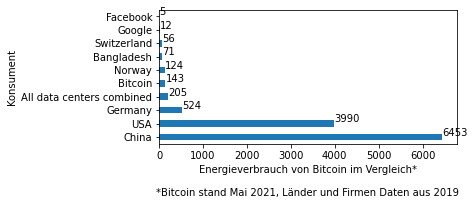

In [5]:
x = energy.iloc[:,0].tolist()
ax = energy.plot(kind='barh', use_index=True, legend=False, figsize=(7,3), sort_columns=False)
plt.gcf().subplots_adjust(bottom=0.26, left=0.31)
ax.set_ylabel('Konsument')
ax.set_xlabel('''Energieverbrauch von Bitcoin im Vergleich*

*Bitcoin stand Mai 2021, Länder und Firmen Daten aus 2019''')
for i, v in enumerate(x):
    ax.text(v + 1, i + .1, str(v), fontweight = 'light')
plt.savefig('./images/energyconsume.pdf')

### Coin Price Charts

In [6]:
bitcoin_price_df = pd.read_csv('btceur.csv')
bitcoin_price_df['time'] = pd.to_datetime(bitcoin_price_df['time'],unit='ms').dt.date
bitcoin_price_df = bitcoin_price_df.drop_duplicates(subset=['time'], keep='first')
bitcoin_price_df = bitcoin_price_df.set_index('time')

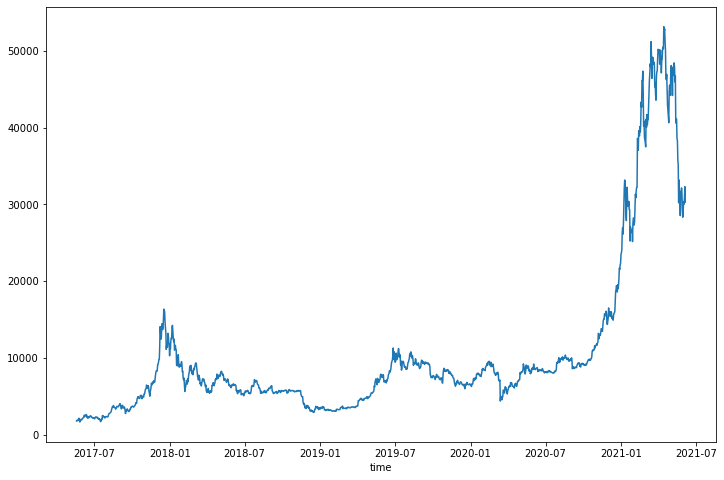

In [7]:
bitcoin_price_df['low'].plot(figsize=(12,8))

In [8]:
bitcoin_price_df = pd.read_csv('btcusd.csv')
bitcoin_price_df['Date'] = pd.to_datetime(bitcoin_price_df['Date'])
bitcoin_price_df = bitcoin_price_df.drop_duplicates(subset=['Date'], keep='first')
bitcoin_price_df = bitcoin_price_df.set_index('Date')
bitcoin_price_df = bitcoin_price_df.iloc[::5, :]

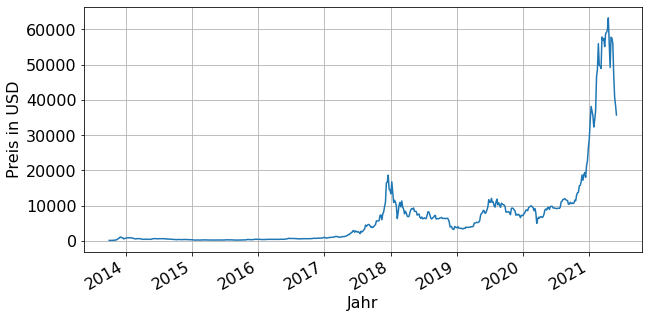

In [9]:
plt.rcParams.update({'font.size': 16})
ax = bitcoin_price_df.Open.plot(figsize=(10,5), x_compat=True)

plt.rc('grid', linestyle="--", color='black')
plt.grid()
ax.set_ylabel('Preis in USD')
ax.set_xlabel('Jahr')
plt.savefig('./images/btcchart.pdf')

https://www.coindesk.com/price/bitcoin

### T4ransavtions

In [20]:
x =['Bitcoin', 'Ethereum', 'EOS', 'VISA']
y = [80,150,3097,24000]
z = [7,20,3097,24000]
data={'Stuff':x, 'transactions/s':y}

In [21]:
transactions = pd.DataFrame(data).set_index('Stuff')
transactions['hidden'] = z

In [22]:
transactions

,transactions/s,hidden
Stuff,,
Bitcoin,80,7
Ethereum,150,20
EOS,3097,3097
VISA,24000,24000


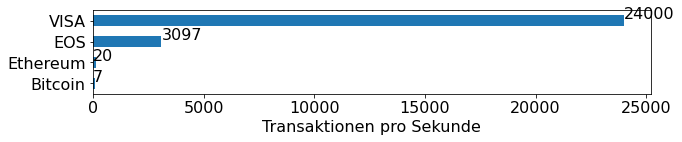

In [25]:
ax = transactions['transactions/s'].plot.barh(figsize=(10,2), legend=False)
ax.set_xlabel('Transaktionen pro Sekunde')
ax.set_ylabel('')
x = transactions.iloc[:,1].tolist()
for i, v in enumerate(x):
    ax.text(v + 1, i + .1, str(v), fontweight = 'light')

plt.gcf().subplots_adjust(bottom=0.3)
plt.savefig('./images/transactions.pdf')